# **Simulación: Amplitudes de las oscilaciones armónicas amortiguadas y forzadas**

Juan Diego Hernández Quintero - 2180253

Grupo H2B, Subgrupo B2

A continuación se mostrará una simulación sobre el proyecto de investigación I4, mediante una visualización de la variación de la amplitud de un péndulo de Pohl que es sometido a un amortiguamiento y a una fuerza externa.

Este péndulo consiste en un disco metálico con un momento de inercia $I[kg*m^2]$que gira en su punto de equilibrio gracias a un resorte helicoidal que produce un momento de torsión $M$ proporcional a la deformación $\theta$, Siendo $k[\frac{Nm}{rad}]$ la constante del resorte

$$M=-k\theta [Nm]$$

El movimiento está descrito por al ecuación diferencial

$$\ddot \theta+\beta \dot \theta+w_o^2\theta=0$$

Donde $\beta=\frac{\gamma}{2I}[\frac{rad}{s}]$ y $w_o=\sqrt{\frac{k}{I}}[\frac{rad}{s}]$, siendo $\gamma$ la constante de amortiguamiento.

La solución a esta ecuación diferencial es

$$\theta=\theta_a e^{\lambda_1 t}+\theta_b e^{\lambda_2 t}[rad]$$

Siendo $\lambda=-\beta\pm\sqrt{\beta^2-w_o^2}$

Si $\beta > w_0$ el movimiento es sobre-amortiguado

Si $\beta = w_0$ el movimiento es críticamente amortiguado

Si $\beta < w_0$ el movimiento es sub-amortiguado

Conociendo los valores de masa y radio del disco, junto con la constante k, y sabiendo que el momento de inercia de un disco es

$$ I= \frac{1}{2} MR^2 [kg*m^2]$$

Se puede calcular la frecuencia angular $w_0 [\frac{rad}{s}]$ del sistema

In [0]:
import numpy as np
import matplotlib.pyplot as plt

masa = 0.3 # [kg]
radio = 0.3 # [m]
k = 5 # [Nm/rad]
I = 0.5*masa*radio**2 # [kg*m^2]
w0 = np.sqrt(k/I) # [rad/s]
print('I =', I, '[kg m^2]')
print('k =', k, '[Nm/rad]')
print('w0 = %0.2f [rad/s] y f = %0.2f [Hz]' % (w0, w0/(2*np.pi))) #con la frecuencia angular se halla el periodo, y con este la frecuencia

I = 0.0135 [kg m^2]
k = 5 [Nm/rad]
w0 = 19.25 [rad/s] y f = 3.06 [Hz]


## **Para el movimiento sub-amortiguado**

En el sistema actúa una frecuencia amortiguada $w_a$
$$w_a = \sqrt{w_0^2 - \beta^2}[\frac{rad}{s}]$$
Junto con un periodo amortiguado $T_a$
$$T_a = \frac{2\pi}{w_a} [s]$$
En este caso, la ecuacion del movimiento es
$$\theta=\theta_0e^{-\beta t}Cos(w_at) [rad]$$

Text(0, 0.5, '$\\theta$  $[^o]$')

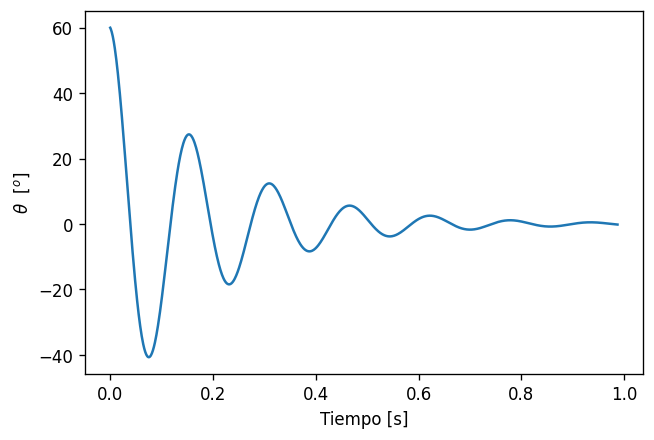

In [0]:
beta = w0/8 #[rad/s]
w = np.sqrt(w0**2 - beta**2) # [rad/s] frecuencia amortiguada
periodo = 2*np.pi/w # [seg] periodo amortiguado
angulo_inicial = np.pi/3 # [rad]
angulo = angulo_inicial*np.exp(-beta*tiempo)*np.cos(w*tiempo) #[rad] Función a graficar

#Construcción de la gráfica amplitud vs tiempo
tiempo = np.linspace(0, 3*periodo, 1000) #genera un array NumPy formado por n números equiespaciados entre dos dados
plt.figure(dpi=120)#numero de pixeles de la figura
plt.plot(tiempo, angulo*180/np.pi) #Se convierte el ángulo de radianes a grados
plt.xlabel('Tiempo [s]')
plt.ylabel(r'$\theta$  $[^o]$')

##**Para el movimiento críticamente amortiguado**
Como $w_0 = \beta [rad/s]$ ; $w_a=0 [rad/s]$

La ecuación del movimiento se reduce a
$$\theta=\theta_0e^{-\betat} [rad]$$

Text(0, 0.5, '$\\theta$  $[^o]$')

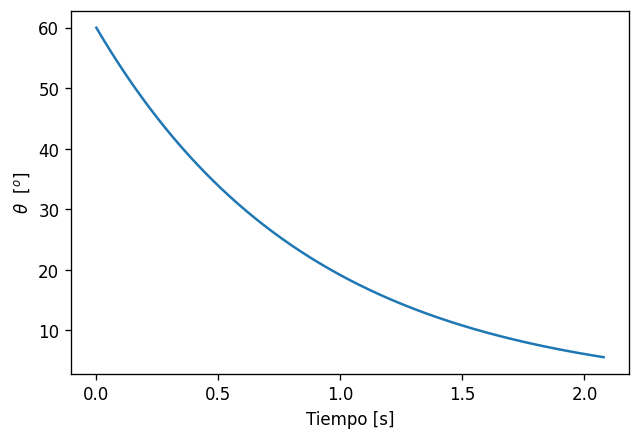

In [0]:
angulo_inicial = np.pi/3 # [rad] Asignación de un angulo inicial
angulo = angulo_inicial*np.exp(-beta*tiempo) #[rad] Función a graficar

#Construcción de la gráfica amplitud vs tiempo
tiempo = np.linspace(0, 5/beta, 1000) 
plt.figure(dpi=120)
plt.plot(tiempo, angulo*180/np.pi) #Se convierte el ángulo de radianes a grados
plt.xlabel('Tiempo [s]')
plt.ylabel(r'$\theta$  $[^o]$')

##**Para el movimiento sobre-amortiguado**
En el proceso de solución de la ecuación diferencial se tiene que
$$\theta = \theta_1e^{\lambda_1 t}+\theta_2e^{\lambda_2 t} $$
Con
$$\lambda=-\beta \pm \sqrt{\beta^2-w_0^2}$$


Text(0, 0.5, '$\\theta$  $[^o]$')

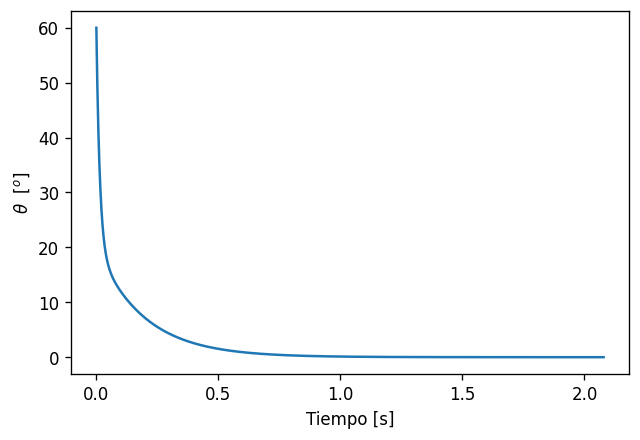

In [0]:
beta = 2*w0 #[rad/s]

#Asignación de valores a los ángulos θ1 y θ2
angulo_1 = angulo_inicial/3
angulo_2 = 2*angulo_inicial/3

#Hallar λ1 y λ2
λ_1 = -beta + np.sqrt(beta**2-w0**2)
λ_2 = -beta - np.sqrt(beta**2-w0**2)

angulo = angulo_1*np.exp(λ_1*tiempo) + angulo_2*np.exp(λ_2*tiempo) # [rad] Función a graficar

#Construcción de la gráfica amplitud vs tiempo
plt.figure(dpi=120)
plt.plot(tiempo, angulo*180/np.pi) #Se convierte el ángulo de radianes a grados
plt.xlabel('Tiempo [s]')
plt.ylabel(r'$\theta$  $[^o]$')

## **Para el movimiento forzado**
En este caso el péndulo se somete a una fuerza externa, la cual tiene su propia frecuencia angular $w_f[\frac{rad}{s}]$, la ecuacion diferencial de este movimiento es

$$\ddot \theta+\beta\dot \theta+w_0^2\theta=F_0Cos(w_ft)$$

Su solución general es la suma de la solución del movimiento libre más una solución particular descrita por

$$\theta=\theta_FCos(w_ft-\phi)[rad]$$

Siendo $\phi$ el desfase entre el momento externo y la oscilación

$$\phi = tan^{-1}(\frac{2\beta w_f}{w_0^2-w_f^2})$$

y siendo $\theta_F$

$$\theta_F=\frac{F_0}{\sqrt{(w_f^2-w_o^2)^2+2\beta^2w_f^2}}$$

La frecuencia angular en la que el sistema entra en resonancia, es decir, cuando llega a su amplitud máxima es $w_R[\frac{rad}{s}]$

$$w_R= \sqrt{w_o^2-2\beta^2}[\frac{rad}{s}]$$

Adicionalmente el sistema posee un factor de calidad $Q$, el cual indica qué tanta energía se pierde en cada oscilación

$$Q = \frac{w_0}{2\beta}$$

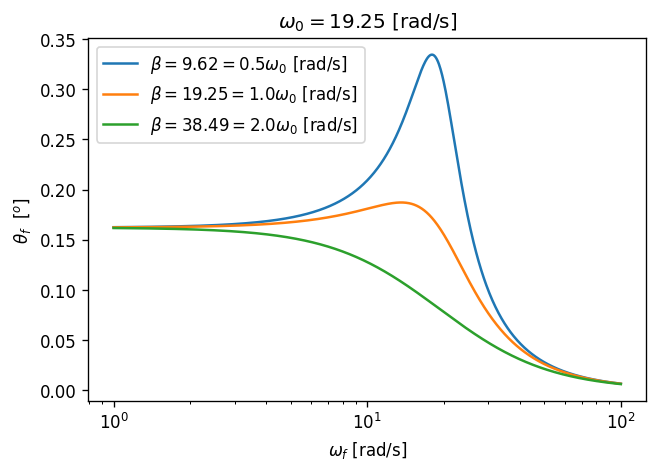

In [0]:
F0 = np.pi/3

w_f = np.logspace(0, 2,1000) #genera un array NumPy formado por n números equiespaciados entre dos dados, pero en escala logarítmica
def A_f(w_f, F0=F0, w0=w0, beta=beta): #Definir función de la amplitud
    return F0/np.sqrt((w_f**2 - w0**2)**2+beta**2*w_f**2)

#Construcción de la gráfica amplitud vs frecuencia angular
plt.figure(dpi=120)
beta_values = [w0/2, w0, 2*w0] #Asignación de valores a beta
k_fig = 0
for beta in beta_values:
    k_fig += 1
    label = r'$\beta=%0.2f = %0.1f\omega_0$ [rad/s]' % (beta, beta/w0)
    plt.semilogx(w_f, 180*A_f(w_f, beta=beta)/np.pi, label=label) #Convertir radianes a grados
    plt.xlabel('$\omega_f$ [rad/s]')
    plt.ylabel(r'$\theta_f$  $[^o]$')
plt.title(r'$\omega_0=%0.2f$ [rad/s]' % w0)
plt.legend()

Text(0.5, 1.0, '$\\omega_0=19.25$ [rad/s]')

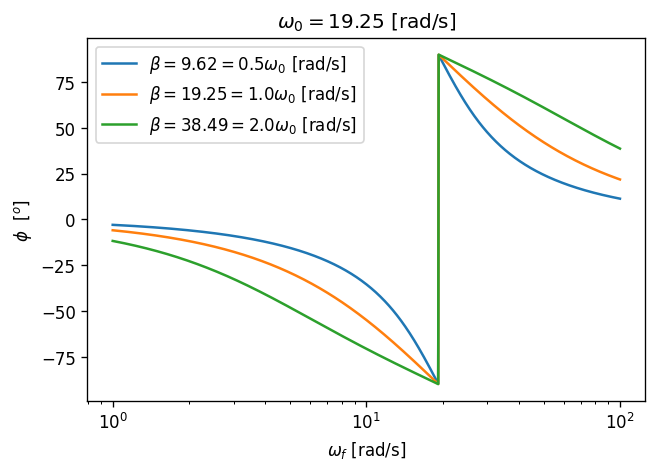

In [0]:
def phi(w_f, F0=F0, w0=w0, beta=beta): #Definir función del desfase
    return np.arctan(2*beta*w_f/(w_f**2 - w0**2))

#Construcción gráfica desfase vs frecuencia angular
plt.figure(dpi=120)
for beta in beta_values:
    k_fig += 1
    label = r'$\beta=%0.2f = %0.1f\omega_0$ [rad/s]' % (beta, beta/w0)
    plt.semilogx(w_f, 180*phi(w_f, beta=beta)/np.pi, label=label)
    plt.xlabel('Tiempo [s]')
    plt.ylabel(r'$A_f$  $[^o]$')
plt.legend()
plt.xlabel('$\omega_f$ [rad/s]')
plt.ylabel(r'$\phi$  $[^o]$')
plt.title(r'$\omega_0=%0.2f$ [rad/s]' % w0)